# **Homework 6**
---

### ***Import the necessary tools***
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import sys
sys.path.insert(0, "/home")

from tqdm import tqdm
from rrccml.Neural_Net import network as net
from rrccml.Neural_Net import layer as lyr          # 
from rrccml.Neural_Net import activation as act_fun # Give the pre-made neural net activation function to operate in this notework

---
### ***Import and view the Original Data***
---

In [2]:
mnist_training = pd.read_csv('~/Files/Data/mnist_train.csv')

In [3]:
mnist_training.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---
### **Setting up the Network**
---

### *Arranging the Data into a Binary Map*

----

In [4]:
numberMap = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:1, 9:0}

In [5]:
mnist_training['label'] = [numberMap[item] for item in mnist_training ['label']]
mnist_training

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---
### *Organize data into an Index*
---

In [26]:
X_Train = mnist_training.iloc[:100 , 1:]
Y_Train = mnist_training.iloc [:100, 0:1]

X_Test = mnist_training.iloc[: , 1:]
Y_Test = mnist_training.iloc[:, 0:1]

In [27]:
mnist_training

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
start = time.time()

---
### *Define Error Function*
---

In [10]:
def error_func(actual, expected):
    return(actual - expected)

---
### *Activate the Network with the arranged Data indexes*

---

In [9]:
mnist_net = net.Network(X_Train, Y_Train)

---
### *Adding Layers*
---

In [11]:
# Hidden Layer 1
mnist_net.add_layer(lyr.Connected(500, 'sigmoid'))

# Hidden Layer 2 
mnist_net.add_layer(lyr.Connected(100, 'sigmoid'))

# Hidden Layer 3 
mnist_net.add_layer(lyr.Connected(30, 'sigmoid'))

# Output Layer
mnist_net.add_layer(lyr.Connected(1, 'sigmoid'))

---
### *Training the Network*
---

In [17]:
mnist_net.compile()

mnist_net.train(x_val=1,y_val=1, epochs=1000, cost_function=error_func, eval_function=None, learning_rate=.01)

end = time.time()
print(f'The neural Network took {round(end - start, 2)} seconds to run the MNIST data.')

/home/rrccml/Neural_Net/activation.py:23: RuntimeWarning: overflow encountered in power
  return 1 / (1 + np.e ** (-z))


The neural Network took 166.73 seconds to run the MNIST data.


---
### *Visualizing the Training Process*
---

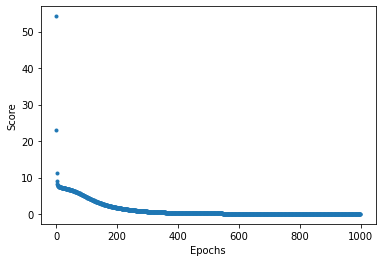

In [19]:
history = np.array(mnist_net.history)

plt.scatter(history[:, 0], history[:, 1], marker='.')
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.show()

In [20]:
W1,W2,W3,W4 = mnist_net.get_weights()

In [28]:
error = 0
predictionLog = []
for x,y in zip(np.array(X_Test), np.array(Y_Test)):
    prediction = mnist_net.forward_pass(x)
    error += np.round(np.abs(prediction - y))
    predictionLog.append(np.round(prediction)[0])
    
print(f"Got {error} wrong out of {len(Y_Test)}")
print(100 * (len(Y_Test) - error)/len(Y_Test),"%")

/home/rrccml/Neural_Net/activation.py:23: RuntimeWarning: overflow encountered in power
  return 1 / (1 + np.e ** (-z))


Got [5631.] wrong out of 60000
[90.615] %


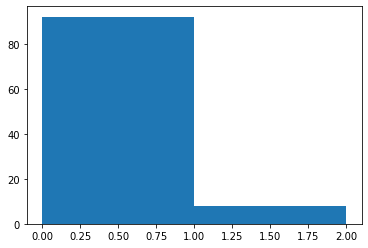

In [24]:
plt.hist(predictionLog, [0,1,2])
plt.show()